Q perform classification task using KNN classification method on wine-red.csv.dataset, find accuracy_score?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


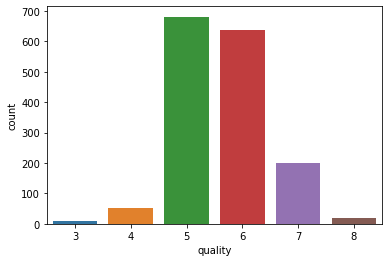

In [4]:
import seaborn as sns
sns.countplot(x='quality',data=df)

In [6]:
# for values greater than 6 value will be 1 else 0
df['quality']=[1 if x > 6 else 0 for x in df.quality]

In [7]:
#split data 
X = df.drop('quality',axis=1)
Y = df['quality']

In [8]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X)
sc_feature = scalar.transform(X)
sc_feature

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sc_feature,Y,test_size=0.3,random_state=40)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,40):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,Y_train)
  pred=knn.predict(X_test)
  error_rate.append(np.mean(pred!=Y_test))

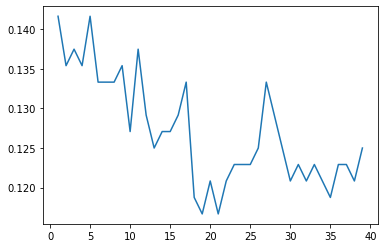

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),error_rate)

In [17]:
knn = KNeighborsClassifier(24)
knn.fit(X_train,Y_train)
predictions=knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test,predictions))

[[404   7]
 [ 52  17]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       411
           1       0.71      0.25      0.37        69

    accuracy                           0.88       480
   macro avg       0.80      0.61      0.65       480
weighted avg       0.86      0.88      0.85       480

0.8770833333333333
